### Statistical Analysis of City Employees Salaries (Los Angeles and San Francisco)

In [2]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt

Data Sets used in the project are from the website: [Transparent California](https://transparentcalifornia.com/)

In [18]:
# Los Angeles City's Employees data
los_sal = pd.concat(map(pd.read_csv, ['salaries/los-angeles-2018.csv', 'salaries/los-angeles-2019.csv', 'salaries/los-angeles-2020.csv',
                                    'salaries/los-angeles-2021.csv']), ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\concat.py:294: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(


In [19]:
# Data Transformation
los_sal['Job Title'] = los_sal['Job Title'].str.replace('Police Officer Ii','Police Officer II')
los_sal['Job Title'] = los_sal['Job Title'].str.replace('Police Officer IIi','Police Officer III')
los_sal['Job Title'] = los_sal['Job Title'].str.replace('Firefighter Iii','Firefighter III')
los_sal['Job Title'] = los_sal['Job Title'].str.replace('Special Program Assistant Ii','Special Program Assistant II')
los_sal['Job Title'] = los_sal['Job Title'].apply(str.capitalize)

In [20]:
# Number employees employed by Job Title (year:2018,2019,2020,2021)
los_2018 = los_sal[los_sal['Year'] == 2018]['Job Title'].value_counts().rename_axis('Job Title').reset_index(name='counts')
los_2019 = los_sal[los_sal['Year'] == 2019]['Job Title'].value_counts().rename_axis('Job Title').reset_index(name='counts')
los_2020 = los_sal[los_sal['Year'] == 2020]['Job Title'].value_counts().rename_axis('Job Title').reset_index(name='counts')
los_2021 = los_sal[los_sal['Year'] == 2021]['Job Title'].value_counts().rename_axis('Job Title').reset_index(name='counts')

In [21]:
# Top five job categories with highest number of employees in year:2018
los_2018.head()

,Job Title,counts
0,Police officer ii,4040
1,Recreation assistant,2539
2,Police officer iii,2318
3,Firefighter iii,1656
4,Administrative clerk,1608


In [22]:
# Merging data 
df = pd.merge(los_2018, los_2019, how = 'outer',on = ['Job Title'])
df.rename(columns = {df.columns[1]:'2018', df.columns[2]:'2019'})
df = pd.merge(df, los_2020, how = 'outer',on = ['Job Title'])
df.rename(columns = {df.columns[1]:'2018', df.columns[2]:'2019',df.columns[3]:'2020'},inplace = True)

In [23]:
df1 = pd.merge(df, los_2021, how= 'outer', on = ['Job Title'])
df1['2021'] = df1['counts']
df1.drop(columns = 'counts', inplace = True)

In [24]:
df1.fillna(0, inplace = True)
df1 = df1.astype({'2018':'int', '2019': 'int', '2020': 'int', '2021': 'int'})

In [25]:
df2 = df1[:11]

In [29]:
# Number of employees data of Top 11 Job Titles  
df2

,Job Title,2018,2019,2020,2021
0,Police officer ii,4040,4403,4325,4516
1,Recreation assistant,2539,2573,2069,2109
2,Police officer iii,2318,2511,2399,2282
3,Firefighter iii,1656,1760,1791,1739
4,Administrative clerk,1608,2009,1830,1782
5,Special program assistant ii,1061,1122,994,1056
6,Senior administrative clerk,934,1126,1551,1535
7,Police sergeant i,845,919,816,863
8,Police officer i,825,1214,1020,842
9,Refuse collection truck operator ii,741,798,765,745


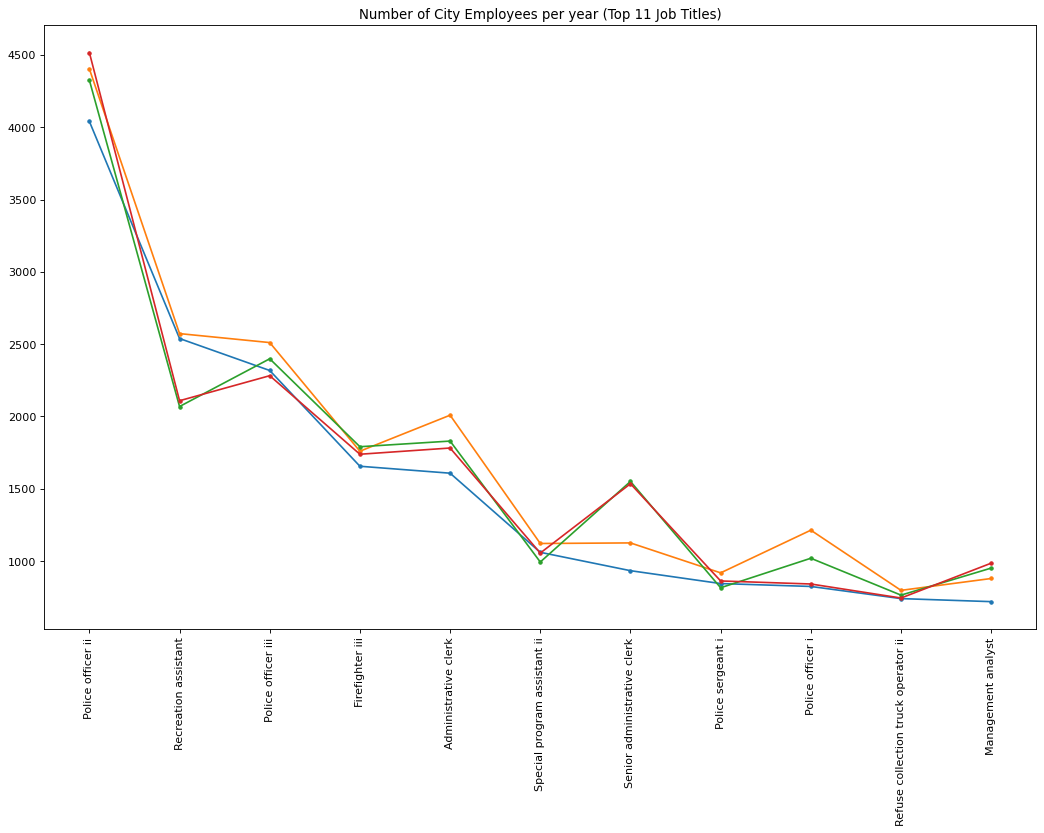

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(16, 10), dpi=80)
# set the title
plt.title('Number of City Employees per year (Top 11 Job Titles)')
plt.xticks(rotation = 90)

# Plot by Year
plt.plot(df2['Job Title'], df2['2018'], marker= '.')
plt.plot(df2['Job Title'], df2['2019'], marker= '.')
plt.plot(df2['Job Title'], df2['2020'], marker= '.')
plt.plot(df2['Job Title'], df2['2021'], marker= '.')


In [31]:
# Mean, median salary of Los Angeles employee in the given years. 
# Year: 2018
los_sal18 = los_sal[los_sal['Year'] == 2018]
print("The mean salary in 2018(Los Angeles):$", los_sal[los_sal['Year'] == 2018]['Total Pay'].mean())
print("The median salary in 2018(Los Angeles):$", los_sal[los_sal['Year'] == 2018]['Total Pay'].median())
los_sal = los_sal.loc[(los_sal !=0).any(axis=1)]
print("The median salary in 2018(Los Angeles):$", los_sal[los_sal['Year'] == 2018]['Total Pay'].mode()[0])

The mean salary in 2018(Los Angeles):$ 82556.93938642056
The median salary in 2018(Los Angeles):$ 80528.32
The median salary in 2018(Los Angeles):$ 16477.6


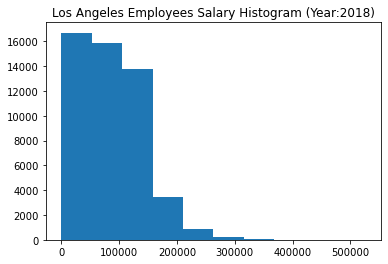

In [34]:
plt.hist(los_sal[los_sal['Year'] == 2018]['Total Pay'])
plt.title("Los Angeles Employees Salary Histogram (Year:2018)")
plt.show()

The number of employees having the salary less than 265000: 50656


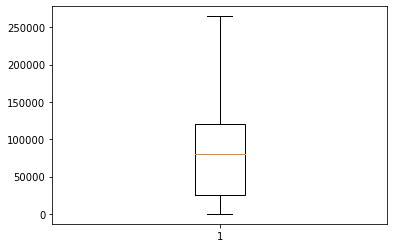

In [35]:
# Box Plot of employee salary less than 265000
print('The number of employees having the salary less than 265000:', len(los_sal18[los_sal18['Total Pay'] < 265000]['Total Pay']) )
plt.boxplot(los_sal18[los_sal18['Total Pay'] < 265000]['Total Pay'])
plt.show()

The number of employees having the salary greater than 265000: 291


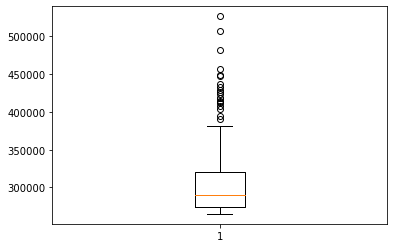

In [36]:
# Box Plot of employee salary greater than 265000
print('The number of employees having the salary greater than 265000:',len(los_sal18[los_sal18['Total Pay'] > 265000]['Total Pay']) )
plt.boxplot(los_sal18[los_sal18['Total Pay'] > 265000]['Total Pay'])
plt.show()

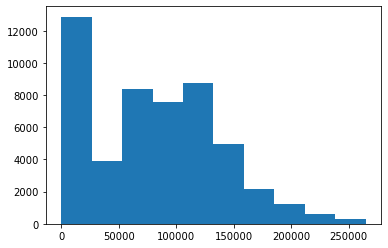

In [37]:
# Histogram for employees having salary less than 265000
plt.hist(los_sal18[los_sal18['Total Pay'] < 265000]['Total Pay'])
plt.show()

In [38]:
# Population Data 
pop_265 = los_sal18['Total Pay']
print("The Mean of population:", np.mean(pop_265))
print("The standard deviation of population:", np.std(pop_265))
print('The coefficient variation of population:', np.std(pop_265)/np.mean(pop_265))

The Mean of population: 82556.93938642056
The standard deviation of population: 58991.919031303354
The coefficient variation of population: 0.7145603927391557


In [39]:
import random
# Sampled list generated from the Population (Employees Salary List)
def sample_list(lis):
    n = int(len(lis)/35)
    return(random.sample(lis, n))

In [40]:
samp = sample_list(list(pop_265))

In [41]:
print("The mean of sample:$", round(np.mean(samp),2))
print("The standard deviation of sample:$",round(np.std(samp),2))
print("The coefficient variation of sample:", np.std(samp)/np.mean(samp))
print('Variance in population and sample mean:$', round(np.std(pop_265)- np.std(samp),2))
print('The sample mean successfully estimates the population mean with low variance of $%s' % round((np.std(pop_265)- np.std(samp)),2))

The mean of sample:$ 84513.12
The standard deviation of sample:$ 58594.58
The coefficient variation of sample: 0.6933192858520859
Variance in population and sample mean:$ 397.34
The sample mean successfully estimates the population mean with low variance of $397.34


In [42]:
x = list(los_sal18['Total Pay'])
y = list(los_sal18['Benefits'])
r = np.corrcoef(x,y)
print("The correlation between the pay and benefits:", r[1][0])

The correlation between the pay and benefits: 0.9157005617602285


In [33]:
def standardization(sample):
    mean = np.mean(sample)
    std = np.std(sample)
    z = []
    for i in sample:
        a = (i - mean) / std
        z.append(a)
    return z
    

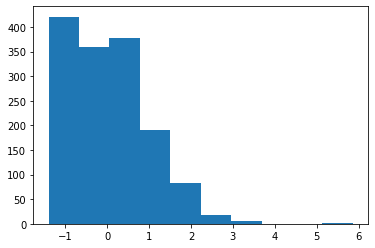

In [34]:
# Standardizing total pay of employees
samp = sample_list(list(pop_265))
std_sal = standardization(samp)
plt.hist(std_sal)
plt.show()

In [35]:
# After standardization of sample data
print("The mean after standardization: ", round(np.mean(std_sal),1))
print("The standard deviation after standardization:", np.std(std_sal))

The mean after standardization:  -0.0
The standard deviation after standardization: 1.0


In [36]:
# Sampling Distributions of the mean (Central limit Theorem)
def sample_dist(pop):
    z = []
    for i in range(34):
        samp = sample_list(list(pop))
#         standardization(samp)
        z.append(np.mean(samp))
    return z
    

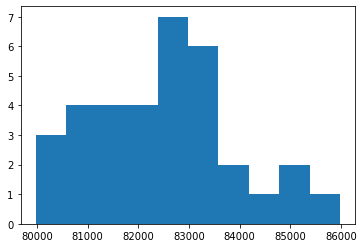

In [37]:
dist = sample_dist(pop_265)
plt.hist(dist)
plt.show()

In [38]:
# Standard Error (how well approximation of true mean)
print("The standart error of the sample distribution:",np.std(dist)/ (len(dist))**0.5  )

The standart error of the sample distribution: 238.28884156630042


In [39]:
# Confidence Interval 
import scipy.stats as st
    

In [40]:
los_sal18[los_sal18['Job Title']=='Police officer ii']['Status'].value_counts()

FT    3849
PT     191
Name: Status, dtype: int64

In [41]:
pf_sal = los_sal18[los_sal18['Job Title']=='Police officer ii']['Total Pay']

In [42]:
# create 99% confidence interval for police officer ii mean salary
st.norm.interval(alpha = 0.99,
                loc = np.mean(pf_sal),
                scale =st.sem(pf_sal))

(107371.0580517572, 109542.90080962921)

We are 99 percent confident that salary of police officer ii will be in the interval of [$107371.0580517572, $109542.90080962921]

In [43]:
# For small sample size (say less than 30)
spf_sal = random.sample(list(pf_sal), 28)

In [44]:
st.t.interval(alpha= 0.99, df = len(spf_sal)-1,
             loc = np.mean(spf_sal),
             scale = st.sem(spf_sal))

(100792.07258810026, 119342.0945547569)

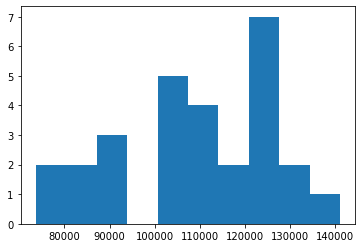

In [45]:
plt.hist(spf_sal)
plt.show()

In [46]:
# Los Angeles Employees Salary (Year:2018)
los_sal21 = los_sal[los_sal['Year']== 2018]

# Salary of Police officer ii rank 
pf_sal = los_sal18[los_sal18['Job Title'] == 'Police officer ii']['Total Pay']
pf_sal18 = pf_sal[pf_sal>0.0]

In [47]:
# Los Angeles Employees Salary (Year:2021)
los_sal21 = los_sal[los_sal['Year']== 2021]

# Salary of Police officer ii rank 
pf_sal = los_sal21[los_sal21['Job Title'] == 'Police officer ii']['Total Pay']
pf_sal21 = pf_sal[pf_sal>0.0]

In [48]:
# Difference
diff_mean = np.mean(pf_sal18) - np.mean(pf_sal21)
diff_std = np.std(pf_sal18) - np.std(pf_sal21)
error = ((np.mean(pf_sal18)**2/len(pf_sal18)) + (np.mean(pf_sal21)**2/len(pf_sal21)))**0.5

In [49]:
from scipy.stats import norm

# Desired confidence interval
C = 0.95

# Calculate confidence interval
alpha = (1-C)/2
z = norm.ppf(alpha)
interval = (diff_mean + z*error, diff_mean - z*error)
interval

(-8365.122777651259, 997.6286625827106)

From the above confidence interval of 95percent we conclude the mean salaries of the police officers ii in Los Angeles has decreased (from year 2018 to year 2021). There is also a sign of increase in salary of some officers as well but those are small in numbers.  

### Students T-test

In [54]:
# different samples
sam18 = random.sample(list(pf_sal18), 29)
sam21 = random.sample(list(pf_sal21), 24)

In [55]:
mean_sam18 = np.mean(sam18)
mean_sam21 = np.mean(sam21)
std_sam18 = np.std(sam18)
std_sam21 = np.std(sam21)

In [56]:
# Pooled variance formula
s_p = (((len(sam18)-1)*std_sam18**2) + ((len(sam21)-1)*std_sam21**2))/(len(sam18)+len(sam21)-2)

# Pooled standard deviation formula
std_p = s_p**0.5

# Difference
diff_mean = mean_sam18 - mean_sam21
diff_std = std_sam18 - std_sam21
samp_error = ((s_p**2/len(sam18)) + (s_p**2/len(sam21)))**0.5

In [57]:
from scipy.stats import t
# Desired confidence interval
C = 0.99

# Calculate confidence interval
df = len(sam18)+len(sam21) - 2
alpha = (1-C)/2
t = t.ppf(alpha,df)
interval = (diff_mean + t*samp_error, diff_mean - t*samp_error)
interval

(-1006021560.3602422, 1005975171.5685469)

With above given confidence interval of 99percent we cannot conclude that the mean salaries of the police officer ii in Los Angeles has decreased or increased from the year of 2018 to 2021.

### Hypothesis Testing

In [58]:
# San Francisco
sf_sal = pd.concat(map(pd.read_csv, ['salaries/san-francisco-2018.csv', 'salaries/san-francisco-2019.csv', 'salaries/san-francisco-2020.csv',
                                    'salaries/san-francisco-2021.csv']), ignore_index = True)

In [75]:
# Salary data for year:2018
sf_2018 = sf_sal[sf_sal['Year'] == 2018]

In [76]:
# Top 11 hired employees category
sf_2018['Job Title'].value_counts().head(10)

Transit Operator             2741
Special Nurse                1633
Registered Nurse             1445
Firefighter                   914
Public Service Trainee        873
Custodian                     854
Police Officer 3              811
Recreation Leader             762
Police Officer                679
HSA Sr Eligibility Worker     543
Name: Job Title, dtype: int64

In [61]:
# Transit operator salary in year:2018
sf_trn18 = sf_2018[sf_2018['Job Title'] == 'Transit Operator']
# Number of Full time and Part time transit operators
sf_trn18['Status'].value_counts()

FT    2035
PT     706
Name: Status, dtype: int64

In [63]:
# Salary list
trn_18 = sf_trn18['Total Pay']
# sample of transist operator salary
sptrn18 = random.sample(list(trn_18), 35)
# According salary.com mean transit operator salary in San Francisco, California
null_h = 66620 # in US Dollars

In [66]:
def hypothesis_test(sign,val):
    
    # Significance value
    # Calculate confidence interval
    alpha = sign/2
    z = norm.ppf(alpha)
    # Standized z score from the dataset
    dz = (np.mean(val)-null_h)/(np.std(val)/len(val)**0.5)
    if z < dz < -z:
        print("Accept the null hypothesis")
    else: 
        print("Reject null hypothesis") 
    return dz,z

In [69]:
# Significance level
sign = 0.05

# Sample Dataset of transit operator's salary
val = sptrn18

# Hypothesis test
hyp = hypothesis_test(sign,val)

Accept the null hypothesis


At 5 percent significance level we accept the null hypthesis of average transit operator's salary is $ 66,620 in San Francisco, California.

In [72]:
# pvalue is lower than level of significance(alpha): reject null hypothesis
import scipy.stats

# find p-value for two-tailed test
p_val = scipy.stats.norm.sf(hyp[0])*2
print('The P-value:', p_val)

# Significance level
sign = 0.05

if p_val <sign:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

The P-value: 1.5742021181814436
Accept Null Hypothesis


In [74]:
# Salary data for year:2021
sf_2021 = sf_sal[sf_sal['Year'] == 2021]

In [77]:
# Transit operator salary in year:2021
sf_trn21 = sf_2021[sf_2021['Job Title'] == 'Transit Operator']
# Number of Full time and Part time transit operators
sf_trn21['Status'].value_counts()

FT    1812
PT     702
Name: Status, dtype: int64

In [78]:
# Salary list year:2018
trn_18 = sf_trn18['Total Pay']
mean_18 = np.mean(trn_18)
# Salary list year:2021
trn_21 = sf_trn21['Total Pay']
mean_21 = np.mean(trn_21)

In [105]:
# Mean difference of salary 
diff = mean_18 - mean_21

# Hypothesised difference 
hyp_diff  = 100

# standard error of diff
std_err = ((mean_18**2/len(trn_18)) + (mean_21**2/len(trn_21)))**0.5

In [111]:
# Large samples (use z-statistics)
z = (diff-hyp_diff)/std_err
print('The z-score of the data set:', z)
if z < 0:
    print(" The mean salary of Transit operator has dropped in 2021.")
else:
    print(" The rise in mean salary of Tranist Operator in 2021.")
# find p-value for two-tailed test
p_val = scipy.stats.norm.sf(abs(z))*2
print('The P-value:', p_val)

# Significance level
sign = 0.05

if p_val <sign:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

The z-score of the data set: -2.5130812263456637
 The mean salary of Transit operator has dropped in 2021.
The P-value: 0.011968177543519705
Reject Null Hypothesis
